In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data_dir = 'C:\\Users\\oem\\Desktop\\isa_projekty\\jdszr12-databenders\\'

In [3]:
pokedata = pd.read_csv(data_dir + '\\pokemon.csv')

In [4]:
types=['Normal', 'Fire', 'Water', 'Grass', 'Electric', 'Ice', 'Fighting',
       'Poison', 'Ground', 'Flying', 'Psychic', 'Bug',
       'Rock', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy']
multipliers = pd.DataFrame([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0, 1, 1, 0.5, 1],
                           [1, 0.5, 0.5, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0.5, 1, 0.5, 1, 2, 1],
                           [1, 2, 0.5, 0.5, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0.5, 1, 1, 1],
                           [1, 0.5, 2, 0.5, 1, 1, 1, 0.5, 2, 0.5, 1, 0.5, 2, 1, 0.5, 1, 0.5, 1],
                           [1, 1, 2, 0.5, 0.5, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0.5, 1, 1, 1],
                           [1, 0.5, 0.5, 2, 1, 0.5, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0.5, 1],
                           [2, 1, 1, 1, 1, 2, 1, 0.5, 1, 0.5, 0.5, 0.5, 2, 0, 1, 2, 2, 0.5],
                           [1, 1, 1, 2, 1, 1, 1, 0.5, 0.5, 1, 1, 1, 0.5, 0.5, 1, 1, 0, 2],
                           [1, 2, 1, 0.5, 2, 1, 1, 2, 1, 0, 1, 0.5, 2, 1, 1, 1, 2, 1],
                           [1, 1, 1, 2, 0.5, 1, 2, 1, 1, 1, 1, 2, 0.5, 1, 1, 1, 0.5, 1],
                           [1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0.5, 1, 1, 1, 1, 0, 0.5, 1],
                           [1, 0.5, 1, 2, 1, 1, 0.5, 0.5, 1, 0.5, 2, 1, 1, 0.5, 1, 2, 0.5, 0.5],
                           [1, 2, 1, 1, 1, 2, 0.5, 1, 0.5, 2, 1, 2, 1, 1, 1, 1, 0.5, 1],
                           [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0.5, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0.5, 0],
                           [1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 2, 1, 1, 2, 1, 0.5, 1, 0.5],
                           [1, 0.5, 0.5, 1, 0.5, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0.5, 2], 
                           [1, 0.5, 1, 1, 1, 1, 2, 0.5, 1, 1, 1, 1, 1, 1, 2, 2, 0.5, 1]],
                           columns = types, index = types)
                      
                           

In [5]:
pokedata1 = pokedata.drop(pokedata[pokedata.capture_rate == '30 (Meteorite)255 (Core)'].index)
pokedata1['capture_rate'] = pd.to_numeric(pokedata1['capture_rate'], errors = 'raise')

Text(0.5, 1.0, 'Zależność pomiędzy Capture rate a wagą')

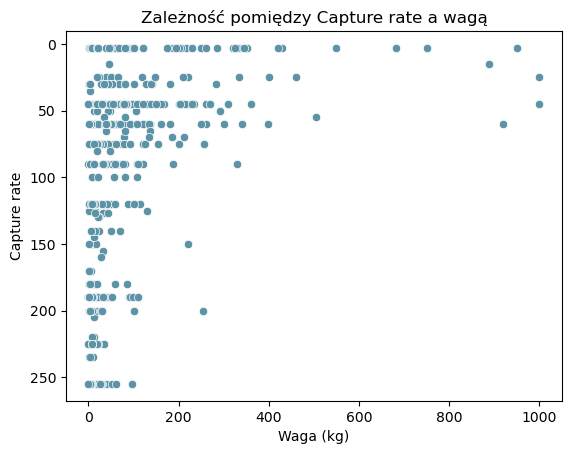

In [6]:
fig, ax = plt.subplots()
sns.scatterplot(data = pokedata1, x = 'weight_kg', y ='capture_rate', color = '#5d93a6').invert_yaxis()
ax.set_ylabel('Capture rate')
ax.set_xlabel('Waga (kg)')
ax.set_title('Zależność pomiędzy Capture rate a wagą')

Text(0.5, 1.0, 'Zależność pomiędzy Capture rate a wzrostem')

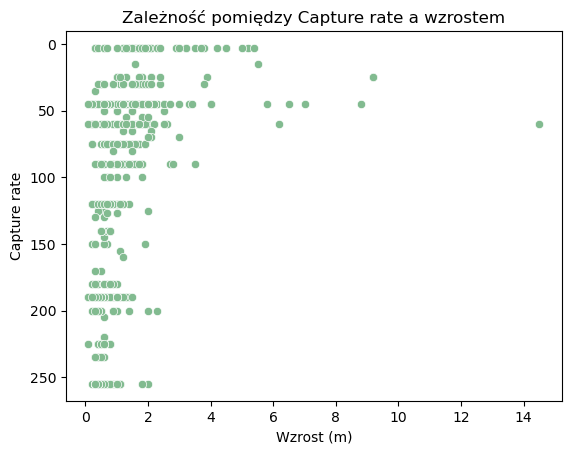

In [7]:
pallete_1={0: '#82bb90', 1 : '#5d93a6'}     
fig, ax = plt.subplots()
sns.scatterplot(data = pokedata1, x = 'height_m', y ='capture_rate', color = '#82bb90').invert_yaxis()
ax.set_ylabel('Capture rate')
ax.set_xlabel('Wzrost (m)')
ax.set_title('Zależność pomiędzy Capture rate a wzrostem')



Text(0.5, 1.0, 'Zależność pomiędzy Capture rate a Base total')

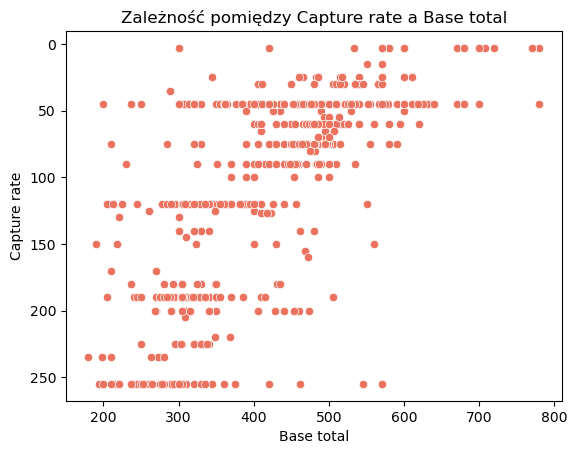

In [8]:
fig, ax = plt.subplots()
sns.scatterplot(data = pokedata1, x = 'base_total', y ='capture_rate', color = '#eb725e').invert_yaxis()
ax.set_ylabel('Capture rate')
ax.set_xlabel('Base total')
ax.set_title('Zależność pomiędzy Capture rate a Base total')

In [9]:
pokedata1['capture_rate'].corr(pokedata1['weight_kg'])

-0.3273858637218935

In [10]:
pokedata1['capture_rate'].corr(pokedata1['height_m'])

-0.3830492285608503

In [11]:
pokedata1['capture_rate'].corr(pokedata1['base_total'])

-0.7121201962428769

In [12]:
pokedata2 = pokedata1[['abilities','attack', 'base_total', 'capture_rate', 'defense', 'experience_growth',
                     'height_m', 'hp','name', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary']]

In [13]:
# replikuję każdy wiersz (każdy pokemon występuje teraz dwa razy)

pokedata3 = pd.DataFrame(np.repeat(pokedata2.values, 2, axis=0))

# przydzielam ponownie nazwy kolumn
    
pokedata3.columns = pokedata2.columns


In [14]:
# kilka pokemonów ma ten sam typ w type1 i type2, naprawiam to zastępując type2 NaNem
pokedata3.type2 = pd.np.where(pokedata3.type2 == pokedata3.type1, np.nan, pokedata3.type2) 

# w co drugim indeksie zastępuję wartość z type 1 na type2
pokedata3.type1 = pd.np.where(pokedata3.index % 2 == 0, pokedata3.type2, pokedata3.type1)

# tworzę nowy df bez kolumny type2, która już nie jest potrzebna
pokedata4 = pokedata3[['abilities', 'attack', 'base_total', 'capture_rate', 'defense', 'experience_growth',
                     'height_m', 'hp','name', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'weight_kg',
       'generation', 'is_legendary']]

# pozbywam się zduplikowanych pokemonów, które nie miały drugiego typu (a więc teraz mają NaN w pierwszym typie)

pokedata5 = pokedata4[pokedata4['type1'].notna()]

C:\Users\oem\AppData\Local\Temp\ipykernel_11084\3837655468.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pokedata3.type2 = pd.np.where(pokedata3.type2 == pokedata3.type1, np.nan, pokedata3.type2)
C:\Users\oem\AppData\Local\Temp\ipykernel_11084\3837655468.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pokedata3.type1 = pd.np.where(pokedata3.index % 2 == 0, pokedata3.type2, pokedata3.type1)


In [15]:
# paleta kolorów da poszczególnych typów:

type_colors={'normal': '#a8a878', 'fire' : '#f08030', 'water' : '#6890f0', 'grass' : '#78c850',
            'electric' : '#f8d030', 'ice' : '#98d8d8', 'fighting' : '#c03028', 'poison' : '#a040a0',
            'ground' : '#e0c068', 'flying' : '#a890f0' , 'psychic' : '#f85888' , 'bug' : '#a8b820',
            'rock' : '#b8a038' , 'ghost' : '#705898', 'dragon' : '#7038f8' , 'dark' : '#705848',
            'steel' : '#b8b8d0', 'fairy' : '#ee99ac'}              


In [24]:
# sortowanie ramek wraz ze spadającą medianą
grouped_capture_rate = pokedata5.loc[:,['type1', 'capture_rate']].groupby(['type1']).median().sort_values(by='capture_rate', ascending = False)
pokedata5


,abilities,attack,base_total,capture_rate,defense,experience_growth,height_m,hp,name,pokedex_number,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,318,45,49,1059860,0.7,45,Bulbasaur,1,65,65,45,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",49,318,45,49,1059860,0.7,45,Bulbasaur,1,65,65,45,grass,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",62,405,45,63,1059860,1.0,60,Ivysaur,2,80,80,60,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",62,405,45,63,1059860,1.0,60,Ivysaur,2,80,80,60,grass,13.0,1,0
4,"['Overgrow', 'Chlorophyll']",100,625,45,123,1059860,2.0,80,Venusaur,3,122,120,80,poison,100.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,['Beast Boost'],101,570,15,53,1250000,5.5,223,Guzzlord,799,97,53,43,dragon,888.0,7,1
1595,['Beast Boost'],101,570,15,53,1250000,5.5,223,Guzzlord,799,97,53,43,dark,888.0,7,1
1597,['Prism Armor'],107,600,3,101,1250000,2.4,97,Necrozma,800,127,89,79,psychic,230.0,7,1
1598,['Soul-Heart'],95,600,3,115,1250000,1.0,80,Magearna,801,130,115,65,fairy,80.5,7,1


In [25]:
pokedata5.generation.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=object)

(0.0, 800.0)

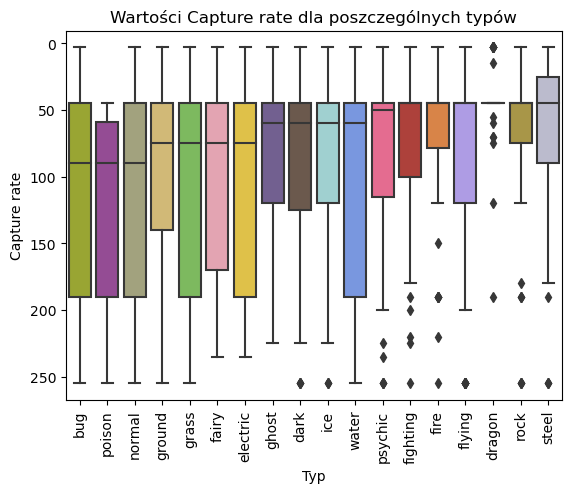

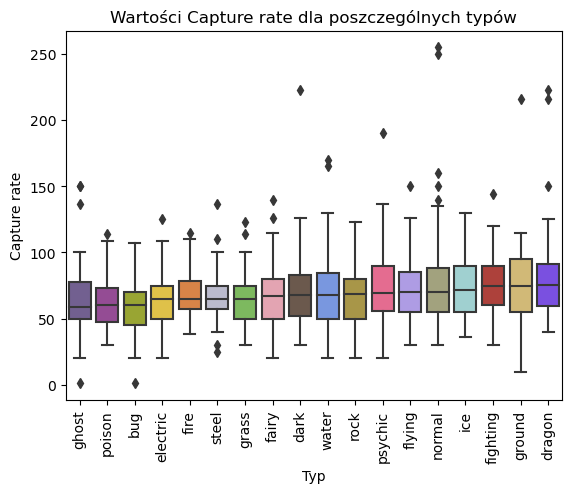

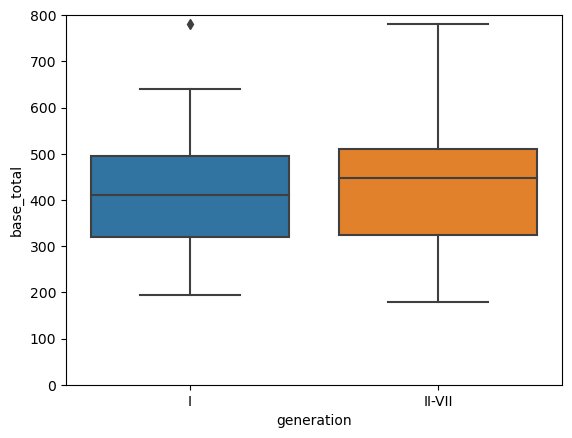

In [53]:
# przykład wykresu z paletą dla typów
fig, ax = plt.subplots()
sns.boxplot(data = pokedata5, x= 'type1', y="capture_rate", palette = type_colors, showmeans=False, order=grouped_capture_rate.index).invert_yaxis()
plt.xticks(rotation = 90)
ax.set_ylabel('Capture rate')
ax.set_xlabel('Typ')
ax.set_title('Wartości Capture rate dla poszczególnych typów')


grouped_hp = pokedata5.loc[:,['type1', 'hp']].groupby(['type1']).median().sort_values(by='hp')
pokedata5

fig, ax = plt.subplots()
sns.boxplot(data = pokedata5, x= 'type1', y="hp", palette = type_colors, showmeans=False, order=grouped_hp.index)
plt.xticks(rotation = 90)
ax.set_ylabel('Capture rate')
ax.set_xlabel('Typ')
ax.set_title('Wartości Capture rate dla poszczególnych typów')

fig, ax = plt.subplots()
sns.boxplot(data = pokedata, x= 'generation', y="base_total")
ax.set_ylim(0,800)




C:\Users\oem\AppData\Local\Temp\ipykernel_11084\965386350.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pokedata_mod_gen.generation = pd.np.where(pokedata_mod_gen.generation == 1 , 'I', pokedata_mod_gen.generation)
C:\Users\oem\AppData\Local\Temp\ipykernel_11084\965386350.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pokedata_mod_gen.generation = pd.np.where(pokedata_mod_gen.generation != 'I', 'II-VII', pokedata_mod_gen.generation)


(0.0, 800.0)

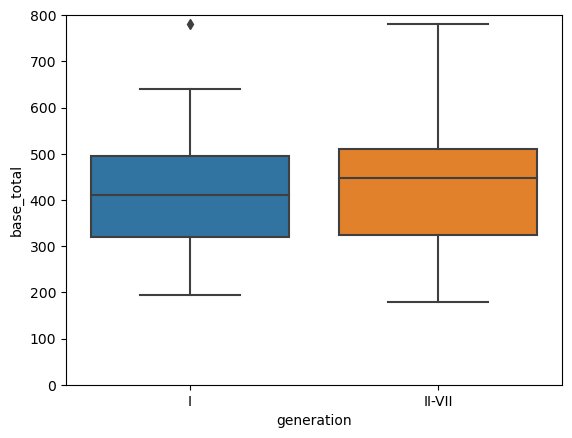

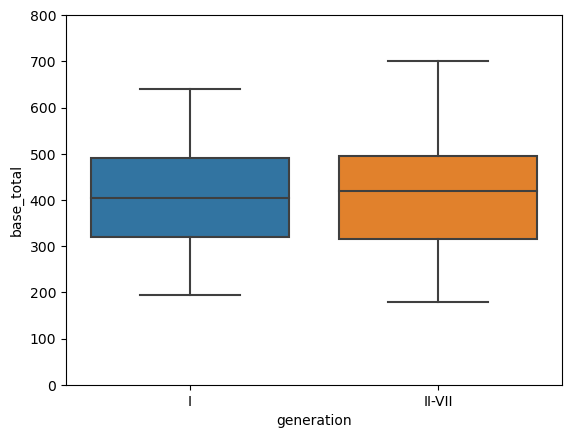

In [54]:
pokedata_mod_gen = pokedata
pokedata_mod_gen.generation = pd.np.where(pokedata_mod_gen.generation == 1 , 'I', pokedata_mod_gen.generation)
pokedata_mod_gen.generation = pd.np.where(pokedata_mod_gen.generation != 'I', 'II-VII', pokedata_mod_gen.generation)
pokedata_mod_gen_nl = pokedata_mod_gen[(pokedata_mod_gen.is_legendary == 0)]
fig, ax = plt.subplots()
sns.boxplot(data = pokedata_mod_gen, x= 'generation', y="base_total")
ax.set_ylim(0,800)


fig, ax = plt.subplots()
sns.boxplot(data = pokedata_mod_gen_nl, x= 'generation', y="base_total")
ax.set_ylim(0,800)



In [145]:
pokedata_mod_gen.sort_values(['abilitites'])



KeyError: 'abilitites'

In [31]:
pokedata5.experience_growth = pd.np.where(pokedata5.experience_growth == 600000, 2.7, pokedata5.experience_growth)
pokedata5.experience_growth = pd.np.where(pokedata5.experience_growth == 800000, 2, pokedata5.experience_growth)
pokedata5.experience_growth = pd.np.where(pokedata5.experience_growth == 1000000, 1.6, pokedata5.experience_growth)
pokedata5.experience_growth = pd.np.where(pokedata5.experience_growth == 1059860, 1.5, pokedata5.experience_growth)
pokedata5.experience_growth = pd.np.where(pokedata5.experience_growth == 1250000, 1.3, pokedata5.experience_growth)
pokedata5.experience_growth = pd.np.where(pokedata5.experience_growth == 1640000, 1, pokedata5.experience_growth)


C:\Users\oem\AppData\Local\Temp\ipykernel_11084\3073536193.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pokedata5.experience_growth = pd.np.where(pokedata5.experience_growth == 600000, 2.7, pokedata5.experience_growth)
C:\Users\oem\AppData\Local\Temp\ipykernel_11084\3073536193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokedata5.experience_growth = pd.np.where(pokedata5.experience_growth == 600000, 2.7, pokedata5.experience_growth)
C:\Users\oem\AppData\Local\Temp\ipykernel_11084\3073536193.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pokedata5.exp

In [32]:
pokedata6 = pokedata5[['type1', 'experience_growth']]
pokedata6.groupby('type1')['experience_growth'].mean()

type1
bug         1.653247
dark        1.472000
dragon      1.402273
electric    1.504255
fairy       1.672340
fighting    1.469811
fire        1.492187
flying      1.543299
ghost       1.624390
grass       1.528866
ground      1.514062
ice         1.494737
normal      1.619266
poison      1.523437
psychic     1.514634
rock        1.677586
steel       1.543478
water       1.576336
Name: experience_growth, dtype: float64

Text(0.5, 1.0, 'Średnie tempo zdobywania doświadczenia w obrębie typów')

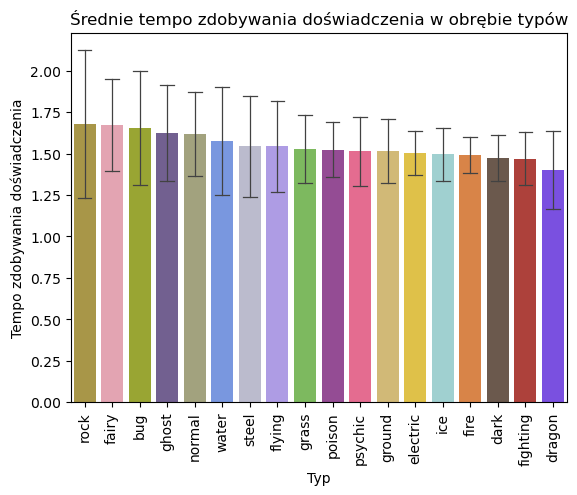

In [52]:
grouped_eg = pokedata6.loc[:,['type1', 'experience_growth']].groupby(['type1']).mean().sort_values(by='experience_growth', ascending = False)

fig, ax = plt.subplots()
sns.barplot(data=pokedata6, x="type1", y='experience_growth', linewidth=3, errorbar="sd", errwidth = 0.9, capsize = 0.5, order = grouped_eg.index, palette = type_colors)
plt.xticks(rotation = 90)
ax.set_ylabel('Tempo zdobywania doświadczenia')
ax.set_xlabel('Typ')
ax.set_title('Średnie tempo zdobywania doświadczenia w obrębie typów')

In [24]:
d0 = ['3', '5', '6', '7', '10', '11', '13', '15', '16', '17', '18', '19', '21', '23', '25', '26', '29', '30', '34', '35', '36', '37']
d4 = ['3', '4', '6', '10', '11', '13', '15', '16', '18', '19', '20', '21', '23', '24', '25', '26', '27', '28', '30','32', '33', '34', '35', '36', '37']
d8 = ['4', '5', '6', '8', '10', '11', '12', '13', '15', '16', '17', '18', '19', '21', '23', '24', '25', '26', '28', '30', '31', '32', '34', '35', '36', '37']
n8 = ['3', '4', '5', '6', '8', '9', '10', '11', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '31', '32', '34', '35', '36', '37']

print(len(d0))
print(len(d4))
print(len(d8))
print(len(n8))

22
25
26
28


Text(0.5, 1.0, '')

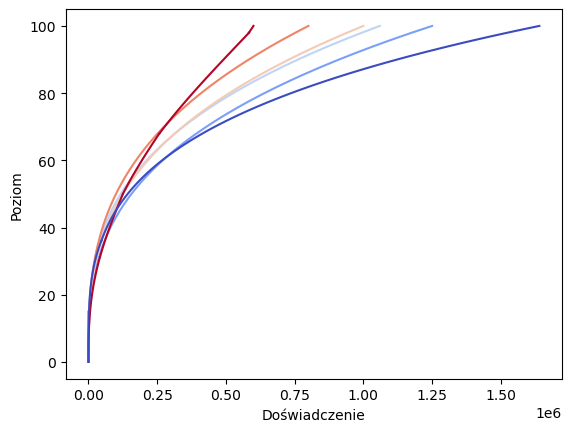

In [25]:
n = np.linspace(0,100)          

fast = (4 * n**3)/5

medium_fast = n**3

medium_slow = (6/5) * n**3 - 15 * n**2 + 100 * n - 140

slow = (5 * n**3)/4




o = np.linspace(0,50,50)  

erratico = ((o**3)*(100-o)/50)

p = np.linspace(50,68,18)  

erraticp = ((p**3)*(150-p)/100)

r = np.linspace(68,98)

erraticr = ((r**3) * (1911 - (10 * r)) / 3) / 500

q = np.linspace(98,100)

erraticq = ((q**3)*(160 - q)/100)

u =np.linspace(0,15)
   
fluctu = (u**3 * ((u + 1)/3) + 24)/50 

v =np.linspace(15,36)

fluctv = ((v**3) * (v + 14))/50

w = np.linspace(36,100, 80)

fluctw = ((w**3) * ((w/2) + 32))/50


fig, ax = plt.subplots()    
plt.plot(slow, n, color = '#7b9ff9')
plt.plot(medium_slow, n, color = '#c0d4f5')
plt.plot(fast, n, color = '#ee8468')
plt.plot(medium_fast, n, color = '#f2cbb7')
erratic = plt.plot(erratico, o, erraticp, p, erraticr, r, erraticq, q, color = '#b40426')
fluct = plt.plot(fluctv, v, fluctu, u, fluctw, w,  color = '#3b4cc0')
ax.set_ylabel('Poziom')
ax.set_xlabel('Doświadczenie')
ax.set_title('')


In [104]:
pokedata.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [123]:
pokedata_against = pokedata[['name', 'type1', 'type2', 'base_total', 'against_bug','against_dark', 'against_dragon','against_electric', 'against_fairy',
                             'against_fight', 'against_fire','against_flying', 'against_ghost', 'against_grass', 'against_ground',
                             'against_ice', 'against_normal', 'against_poison', 'against_psychic','against_rock', 'against_steel', 'against_water']]

against_list = ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']
pokedata_against_2 = pokedata_against[against_list].mean(axis = 1)
pokedata_against_3 = pokedata[['name', 'type1', 'type2', 'base_total']]
pokedata_against_3['against_mean'] = pokedata_against_2
low_against = pokedata_against_3.sort_values('against_mean')

low_against.type2.fillna(low_against.type1, inplace=True)

df = low_against

df['types'] = [set(i) for i in df[['type1', 'type2']].to_numpy()]



C:\Users\oem\AppData\Local\Temp\ipykernel_11084\3149745275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokedata_against_3['against_mean'] = pokedata_against_2


In [171]:
df1 = df.drop_duplicates(subset=['types'], keep='first')

df1 = df1[['against_mean', 'types']]


In [172]:
df1




,against_mean,types
800,0.736111,"{steel, fairy}"
796,0.750000,"{steel, flying}"
680,0.791667,"{steel, ghost}"
482,0.791667,"{steel, dragon}"
394,0.805556,"{steel, water}"
...,...,...
101,1.333333,"{psychic, grass}"
73,1.347222,"{rock, ground}"
540,1.388889,"{bug, grass}"
458,1.388889,"{grass, ice}"


In [126]:
df1 

,against_mean,type1,type2
800,0.736111,steel,fairy
796,0.750000,steel,flying
680,0.791667,steel,ghost
482,0.791667,steel,dragon
394,0.805556,water,steel
...,...,...,...
101,1.333333,grass,psychic
73,1.347222,rock,ground
540,1.388889,bug,grass
458,1.388889,grass,ice


TypeError: unhashable type: 'set'

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'rock & ice'),
  Text(1, 0, 'grass & ice'),
  Text(2, 0, 'bug & grass'),
  Text(3, 0, 'rock & ground'),
  Text(4, 0, 'ground & rock')])

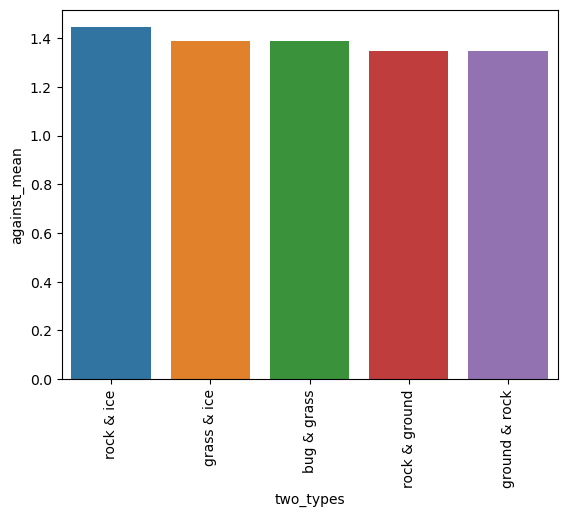

In [28]:
high_against = pokedata_against_3.sort_values('against_mean', ascending = False).head(15)
high_against['two_types'] = high_against['type1'] + ' & ' + high_against['type2']
sns.barplot(data=high_against, x="two_types", y='against_mean')
plt.xticks(rotation = 90)




In [337]:
pokedata[pokedata.name == 'Klefki'].against_poison

706    0.0
Name: against_poison, dtype: float64

In [331]:
multipliers = multipliers.sort_index()
multipliers = multipliers.reindex(sorted(multipliers.columns), axis=1)


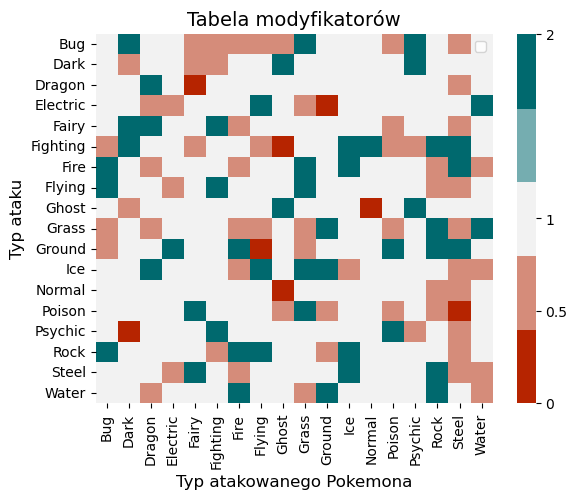

In [236]:
customPalette = sns.diverging_palette(15, 200, s=100, l=40, sep=2, n=5, center = 'light')
type_colors={0: '#a8a878', 1 : '#f08030', 0.5 : '#6890f0', 2 : '#78c850'}

graph1 = sns.heatmap(multipliers, cmap = customPalette, center = 1, robust = True)
graph1.set_title("Tabela modyfikatorów", fontsize = 14)
plt.xlabel('Typ atakowanego Pokemona', fontsize = 12)
plt.ylabel('Typ ataku', fontsize = 12)
plt.legend(labels = [0, 0.5, 1, 2])
colorbar = graph1.collections[0].colorbar
colorbar.set_ticks([0, 0.5, 1, 2])
colorbar.set_ticklabels(['0', '0.5', '1', '2'])

In [148]:
pokedata5




,abilities,attack,base_total,capture_rate,defense,experience_growth,height_m,hp,name,pokedex_number,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary,abilities_count
0,"['Overgrow', 'Chlorophyll']",49,318,45,49,1.5,0.7,45,Bulbasaur,1,65,65,45,poison,6.9,1,0,27
1,"['Overgrow', 'Chlorophyll']",49,318,45,49,1.5,0.7,45,Bulbasaur,1,65,65,45,grass,6.9,1,0,27
2,"['Overgrow', 'Chlorophyll']",62,405,45,63,1.5,1.0,60,Ivysaur,2,80,80,60,poison,13.0,1,0,27
3,"['Overgrow', 'Chlorophyll']",62,405,45,63,1.5,1.0,60,Ivysaur,2,80,80,60,grass,13.0,1,0,27
4,"['Overgrow', 'Chlorophyll']",100,625,45,123,1.5,2.0,80,Venusaur,3,122,120,80,poison,100.0,1,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,['Beast Boost'],101,570,15,53,1.3,5.5,223,Guzzlord,799,97,53,43,dragon,888.0,7,1,15
1595,['Beast Boost'],101,570,15,53,1.3,5.5,223,Guzzlord,799,97,53,43,dark,888.0,7,1,15
1597,['Prism Armor'],107,600,3,101,1.3,2.4,97,Necrozma,800,127,89,79,psychic,230.0,7,1,15
1598,['Soul-Heart'],95,600,3,115,1.3,1.0,80,Magearna,801,130,115,65,fairy,80.5,7,1,14


In [152]:
pokedata5['abilities'].sort_values()

947           ['Adaptability', 'Download', 'Analytic']
849           ['Aftermath', 'Unburden', 'Flare Boost']
850           ['Aftermath', 'Unburden', 'Flare Boost']
851           ['Aftermath', 'Unburden', 'Flare Boost']
848           ['Aftermath', 'Unburden', 'Flare Boost']
                             ...                      
1533                                      ['Wimp Out']
582                                   ['Wonder Guard']
583                                   ['Wonder Guard']
1120    ['Wonder Skin ', 'Magic Guard', 'Tinted Lens']
1121    ['Wonder Skin ', 'Magic Guard', 'Tinted Lens']
Name: abilities, Length: 1209, dtype: object

In [161]:
pokedata5['abilities2'] = [len(i) for i in pokedata5[['abilities']].to_numpy()]


C:\Users\oem\AppData\Local\Temp\ipykernel_11084\3908319624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokedata5['abilities2'] = [len(i) for i in pokedata5[['abilities']].to_numpy()]


In [168]:
pokedata5['abilities2'].unique()

array([1], dtype=int64)

In [71]:
set1 = {'fire', 'rock' }
set2 = {'rock', 'fire'}
set2 = {'rock', 'electric'}
print(set1 == set2)

False
